<a href="https://colab.research.google.com/github/kulvanth5/optimization-techniques/blob/main/204216-MDSC-103-Assignment-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import scipy as sp
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

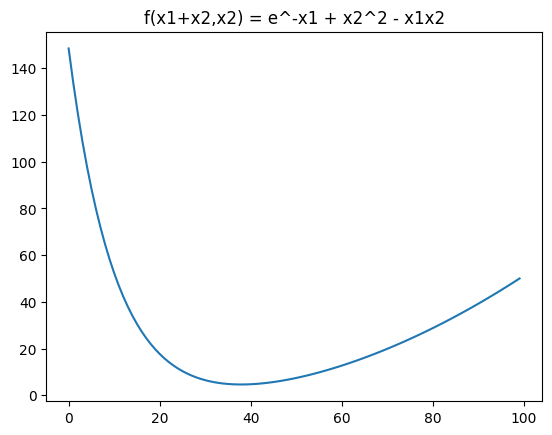

In [116]:
f = lambda x: math.e**-x[0] + x[1]**2 + x[0]*x[1]

x2 = np.linspace(-5,5,100)
x1 = np.linspace(0,5,100)
# x3 = np.linspace(-2.5,0,100)

F = f([x2,x1])

plt.plot(F)
plt.title('f(x1+x2,x2) = e^-x1 + x2^2 - x1x2')
plt.show()


Without constraints

In [118]:
x0 = np.array([35,11])

res = minimize(f,x0)

res


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -143034200.01009178
        x: [ 5.630e+04 -5.363e+04]
      nit: 4
      jac: [-5.363e+04 -5.094e+04]
 hess_inv: [[ 1.693e+00 -2.885e+00]
            [-2.885e+00  4.088e+00]]
     nfev: 360
     njev: 116

with constraints

In [120]:
ct = ({'type':'ineq','fun': lambda x: -3*x[0] - x[1] + 3},
               {'type' : 'ineq', 'fun': lambda x: -5*x[0] + 3*x[1] + 5},
               )

bd = ((0,None),(0,None))

x0 = [33,33]

res1 = minimize(f,x0,bounds=bd,constraints=ct)

res1

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.3678794411714424
       x: [ 1.000e+00  0.000e+00]
     nit: 3
     jac: [-3.679e-01  1.000e+00]
    nfev: 9
    njev: 3

Contour for the above solutions


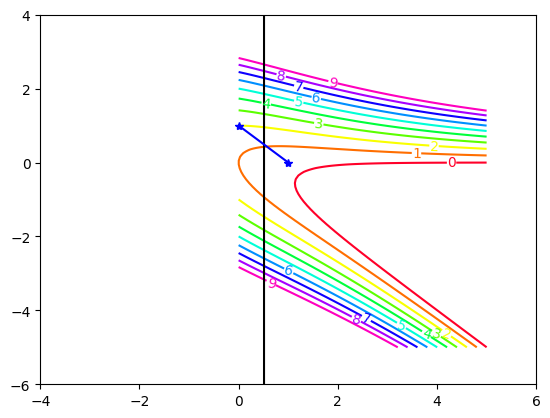

In [139]:
p,q = np.meshgrid(x1,x2)

r = f(np.vstack([p.ravel(),q.ravel()])).reshape(100,100)

height = np.arange(0,10,1)

cp = plt.contour(p,q,r,levels=height,cmap='gist_rainbow')
plt.clabel(cp)
plt.plot(res.x,c='k',marker='x')
plt.plot(res1.x,c='b',marker='*')
plt.axis([-4,6,-6,4])
plt.show()
